In [1]:
import folium
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Create a map centered on Europe
map = folium.Map(location=[51.165691, 10.451526], zoom_start=6)

In [6]:
Europe_2019 = pd.read_csv("C:/Users/rauli/Documents/TUM/Semester III/Network Economics I/NE1-Group/data/EU_routes_2019.csv.gz")

In [7]:
# Load the data containing the locations' names, latitude, and longitude GER 2019
Germany_2019 = Europe_2019.loc[(Europe_2019['origin_country'] == 'Germany') & (Europe_2019['destination_city'] == "Berlin")]

In [ ]:
Germany_2019

In [17]:
# Create edges
for i, edge in Europe_2019.iterrows():
    folium.PolyLine([[edge['origin_latitude'], edge['origin_longitude']],
                     [edge['destination_latitude'], edge['destination_longitude']]],
                    weight=edge['weight'],
                    color='black',
                    opacity=0.3).add_to(map)


In [18]:
# Create markers for nodes
for i, node in Europe_2019.iterrows():
    folium.Marker([node['origin_latitude'], node['origin_longitude']], 
                  popup=str(node['weight'])).add_to(map)

In [ ]:
map

# Plotted network without German map

In [9]:
df = Germany_2019

In [10]:
df = df.rename(columns={'origin_airport_name': "source","destination_airport_name" : "target"})

In [11]:
df = df[['source', 'target', 'weight']]

In [57]:
df

,source,target,weight
1353,Bielefeld Airport,Berlin-Schönefeld Airport,1
2259,Bremen Airport,Berlin-Schönefeld Airport,1
2263,Bremen Airport,Berlin-Tegel Airport,1
2929,Braunschweig-Wolfsburg Airport,Berlin-Schönefeld Airport,3
2931,Braunschweig-Wolfsburg Airport,Berlin-Tegel Airport,1
3412,Cologne Bonn Airport,Berlin-Schönefeld Airport,11
3417,Cologne Bonn Airport,Berlin-Tegel Airport,43
3994,Dresden Airport,Berlin-Schönefeld Airport,2
3995,Dresden Airport,Berlin-Tegel Airport,2
4083,Dortmund Airport,Berlin-Schönefeld Airport,5


In [62]:
value = df.at[12718, 'weight']

# Print the value
print(value)

7


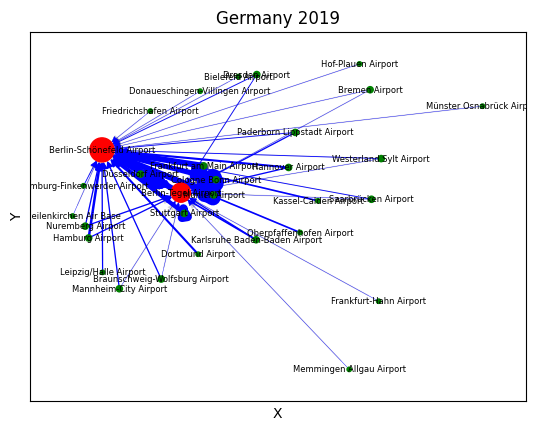

<Figure size 3000x3000 with 0 Axes>

In [81]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


# Create the graph
G = nx.DiGraph()

# Add the edges to the graph
for index, row in df.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["weight"])

  
# Get the node weights
#weights = [d[1] for d in G.degree()]
#weights = nx.get_node_attributes(G, 'weight')

# Get the list of degrees for each node
node_degrees = [val for (node, val) in G.degree()]

# Use the degree list to define the node sizes
node_sizes = [d * 10 for d in node_degrees]

# Use different node colors and sizes
node_colors = ["red" if d[1] > 2 else "green" for d in G.degree()]
#node_sizes = [d[1]*17 for d in G.degree()]
#node_sizes = [weights.get(n, 0) * 20 for n in G.nodes()]

# Calculate the positions of the nodes
pos = nx.spring_layout(G,k=6, iterations=300)

# Use different edge widths
edge_widths = [d['weight']*0.30 for u,v,d in G.edges(data=True)]

# Plot the graph
#nx.draw_networkx_nodes(G, pos, node_size=weights)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.05)
nx.draw_networkx_edges(G, pos, alpha=0.1)

# Plot the graph
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, pos, node_size=node_sizes, node_color=node_colors, edge_color="blue", width=edge_widths, font_size=6)

# Add axis labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Germany 2019")

plt.figure(figsize=(30, 30))

# Show the plot
plt.show()